# Parte 1: Estadísticas para ingenieros que miran el cielo


## 1.1 Promedio y desvio

### Melbourne

In [516]:
import csv

#Lectura del csv
archivo='temperature_Melbourne_celsius.csv'
valores_melbourne= []
promedio_melbourne = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_melbourne = [float(fila[0]) for fila in reader]

promedio_melbourne = sum(valores_melbourne) / len(valores_melbourne)
varianza_melbourne = sum((x - promedio_melbourne)**2 for x in valores_melbourne ) / (len(valores_melbourne) - 1) 
desvio_melbourne=varianza_melbourne**(0.5)

print("Promedio:", promedio_melbourne)
print("Varianza:", varianza_melbourne)
print("Desvio:", desvio_melbourne)


Promedio: 17.53388090349076
Varianza: 41.96000198204841
Desvio: 6.477654049271882


### Oslo

In [517]:
import csv

#Lectura del csv
archivo='temperature_Oslo_celsius.csv'
valores_oslo= []
promedio_oslo = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_oslo = [float(fila[0]) for fila in reader]

promedio_oslo = sum(valores_oslo) / len(valores_oslo)
varianza_oslo = sum((x - promedio_oslo)**2 for x in valores_oslo ) / (len(valores_oslo) - 1) 
desvio_oslo=varianza_oslo**(0.5)

print("Promedio:", promedio_oslo)
print("Varianza:", varianza_oslo)
print("Desvio:", desvio_oslo)

Promedio: 4.611225188227242
Varianza: 89.52365285429613
Desvio: 9.461693973823934


### Quito

In [518]:
import csv

#Lectura del csv
archivo='temperature_Quito_celsius.csv'
valores_quito= []
promedio_quito = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_quito = [float(fila[0]) for fila in reader]

promedio_quito = sum(valores_quito) / len(valores_quito)
varianza_quito = sum((x - promedio_quito)**2 for x in valores_quito ) / (len(valores_quito) - 1) 
desvio_quito=varianza_quito**(0.5)

print("Promedio:", promedio_quito)
print("Varianza:", varianza_quito)
print("Desvio:", desvio_quito)

Promedio: 13.603524982888432
Varianza: 1.6943979779826284
Desvio: 1.3016904309330342


## 1.2 Calcular el factor de correlación cruzada entre cada par de señales

In [519]:
def correlacion_cruzada(valores_A, valores_B, desvio_A, desvio_B, promedio_A, promedio_B, desfasaje):
    producto=0
    for i in range(0, len(valores_A)-desfasaje):
        #suma de los productos de los valores menos sus promedios
        producto = producto + (valores_A[i] * valores_B[i+desfasaje] - promedio_A * promedio_B)
    
    cov=(producto)/len(valores_A)

    correlacion_A_B = cov / (desvio_A * desvio_B)

    return correlacion_A_B


### Melbourne y Oslo

In [520]:
correlacion_cruzada(valores_melbourne, valores_oslo, desvio_melbourne, desvio_oslo, promedio_melbourne, promedio_oslo,0)

-0.22128773176900715

### Melbourne y Quito

In [521]:
correlacion_cruzada(valores_melbourne, valores_quito, desvio_melbourne, desvio_quito, promedio_melbourne, promedio_quito,0)

-0.05331188809647593

### Oslo y Quito

In [522]:
correlacion_cruzada(valores_oslo, valores_quito, desvio_oslo, desvio_quito, promedio_oslo, promedio_quito,0)

0.06617787220981441

Con estos datos podemos decir que las temperaturas en las distintas ciudades no tienen nada que ver una con la otra, el clima de una no nos aporta ninguna información sobre el clima en las otras ciudades. Ahora bien que pasa si realizamos un desfasaje?

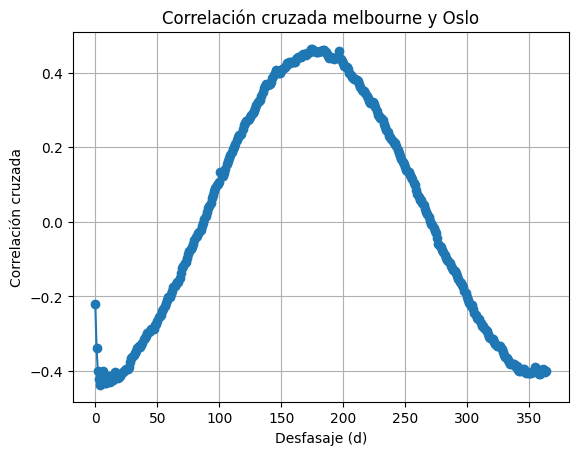

In [523]:
correlaciones_cruzadas = []

#Valor de desfasaje
d=365

for i in range(0,d):
    correlaciones_cruzadas.append(correlacion_cruzada(valores_melbourne, valores_oslo, desvio_melbourne, desvio_oslo, promedio_melbourne, promedio_oslo,i))

import matplotlib.pyplot as plt


desfases = list(range(0, d))


plt.plot(desfases, correlaciones_cruzadas, marker='o')  


plt.xlabel('Desfasaje (d)')
plt.ylabel('Correlación cruzada')
plt.title('Correlación cruzada melbourne y Oslo')
plt.grid(True)

plt.show()



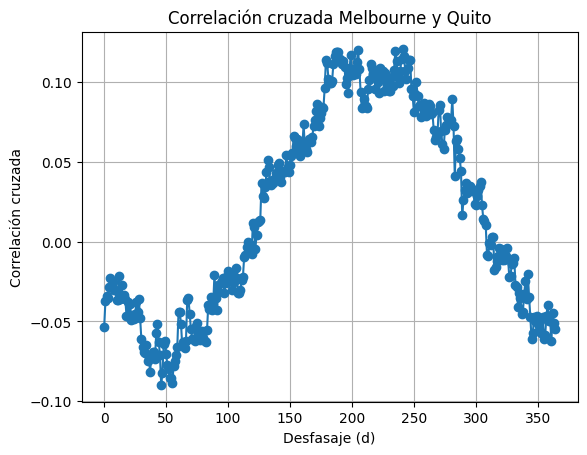

In [524]:
correlaciones_cruzadas = []
for i in range(0,d):
    correlaciones_cruzadas.append(correlacion_cruzada(valores_melbourne, valores_quito, desvio_melbourne, desvio_quito, promedio_melbourne, promedio_quito,i))

import matplotlib.pyplot as plt


desfases = list(range(0, d))


plt.plot(desfases, correlaciones_cruzadas, marker='o')  


plt.xlabel('Desfasaje (d)')
plt.ylabel('Correlación cruzada')
plt.title('Correlación cruzada Melbourne y Quito')
plt.grid(True)

plt.show()

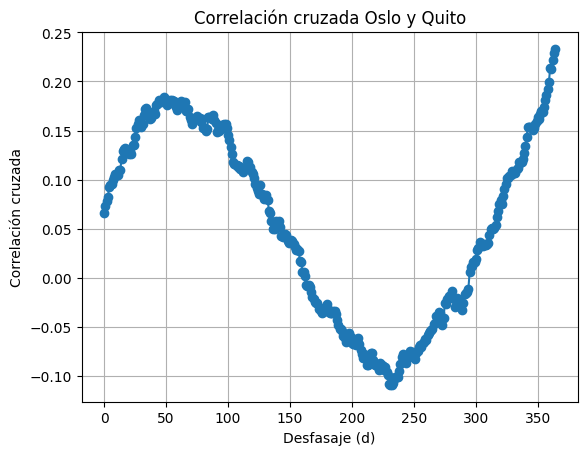

In [525]:
correlaciones_cruzadas = []
for i in range(0,d):
    correlaciones_cruzadas.append(correlacion_cruzada(valores_oslo, valores_quito, desvio_oslo, desvio_quito, promedio_oslo, promedio_quito,i))

import matplotlib.pyplot as plt


desfases = list(range(0, d))


plt.plot(desfases, correlaciones_cruzadas, marker='o')  


plt.xlabel('Desfasaje (d)')
plt.ylabel('Correlación cruzada')
plt.title('Correlación cruzada Oslo y Quito')
plt.grid(True)

plt.show()

# Parte 2: Una fuente de calor... markoviana

In [526]:
def crear_fuente(valores):
    fuente_num = []
    fuente_alfa = []
    for i in valores:
        #Discretizacion de los valores
        if (i < 11.0):
            fuente_num.append(0)
            fuente_alfa.append("F")
        elif ((i >= 11.0) and (i < 19.0)):
            fuente_num.append(1)
            fuente_alfa.append("T")
        else:
            fuente_num.append(2)
            fuente_alfa.append("C")
    return fuente_num, fuente_alfa

In [527]:
fuente_quito, fuente_alfa_quito = crear_fuente(valores_quito)
fuente_melbourne, fuente_alfa_melbourne = crear_fuente(valores_melbourne)
fuente_oslo, fuente_alfa_oslo = crear_fuente(valores_oslo)

print(fuente_quito )
print(fuente_melbourne)
print(fuente_oslo)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 1. Matrices de transición

In [528]:
import numpy as np

def matriz_transicion(fuente):
    m_transicion = np.zeros((3, 3), dtype=float)
    #Barremos todo el arreglo mirando el simolo actual como salida y el anterior como entrada
    for i in range(1, len(fuente)):
        m_transicion[fuente[i], fuente[i - 1]] += 1

    # Sumar columnas
    suma_columnas = [0, 0, 0]
    for i in range(3):
        for j in range(3):
            suma_columnas[j] += m_transicion[i, j]

    # Normalizar columnas
    for i in range(3):
        for j in range(3):
            if suma_columnas[j] != 0:
                m_transicion[i, j] /= suma_columnas[j]

    print("Matriz de transición:")
    print(m_transicion)
    #print("Sumas por columna:")
    #print(suma_columnas)
    return m_transicion


In [529]:
m_transicion_quito = matriz_transicion(fuente_quito)
m_transicion_melbourne = matriz_transicion(fuente_melbourne)
m_transicion_oslo = matriz_transicion(fuente_oslo)

Matriz de transición:
[[5.40540541e-02 6.03240262e-03 0.00000000e+00]
 [9.45945946e-01 9.93278180e-01 1.00000000e+00]
 [0.00000000e+00 6.89417442e-04 0.00000000e+00]]
Matriz de transición:
[[0.47       0.03347988 0.00260611]
 [0.495      0.83564423 0.14408042]
 [0.035      0.13087589 0.85331348]]
Matriz de transición:
[[0.95932119 0.09939024 0.        ]
 [0.04067881 0.8652439  0.29591837]
 [0.         0.03536585 0.70408163]]


## 2. Muestreo Montecarlo

### Probabilidad estacionaria

#### Calculamos la matriz de transicion acumulada 

In [530]:
def matriz_acumulada(m_transicion):
    m_acumulada = np.zeros((3, 3), dtype=float)
    #Inicializamos la primera fila de la matriz acumulada
    for j in range(3):
        m_acumulada[0][j] = m_transicion[0, j]
    #por cada elemento de la matriz le asignamos el valor de la fila anterior + el valor de la matriz de transicion
    for i in range(1, 3):
        for j in range(0, 3):
            m_acumulada[i][j] = m_acumulada[i-1][j] + m_transicion[i][j]
    
    return m_acumulada

In [531]:
m_acumulada_quito = matriz_acumulada(m_transicion_quito)
m_acumulada_melbourne = matriz_acumulada(m_transicion_melbourne)
m_acumulada_oslo = matriz_acumulada(m_transicion_oslo)

print(m_acumulada_quito)
print(m_acumulada_melbourne)
print(m_acumulada_oslo)

[[0.05405405 0.0060324  0.        ]
 [1.         0.99931058 1.        ]
 [1.         1.         1.        ]]
[[0.47       0.03347988 0.00260611]
 [0.965      0.86912411 0.14668652]
 [1.         1.         1.        ]]
[[0.95932119 0.09939024 0.        ]
 [1.         0.96463415 0.29591837]
 [1.         1.         1.        ]]


#### Calculamos las probabilidades del primer simbolo y la probabilidad acumulada

In [532]:
#Basicamente contamos cuantos simbolos tenemos de cada tipo y los dividimos por el totla de simbolos para obtener un vector de probabilidades inicial.
def probabilidad_simbolos(fuente):
    probabilidad = [0, 0, 0]
    for s in fuente:
        probabilidad[s] += 1

    for i in range(3):
        probabilidad[i] = probabilidad[i] / len(fuente)
    
    return probabilidad

In [533]:
prob_quito = probabilidad_simbolos(fuente_quito)
prob_melbourne = probabilidad_simbolos(fuente_melbourne)
prob_oslo = probabilidad_simbolos(fuente_oslo)

print(prob_quito)
print(prob_melbourne)
print(prob_oslo)

[0.006331279945242984, 0.992984257357974, 0.0006844626967830253]
[0.034223134839151265, 0.5059890485968515, 0.45978781656399725]
[0.6858316221765913, 0.2806297056810404, 0.03353867214236824]


In [534]:

def probabilidad_simb_acumulada(prob):
    prob_acumulada = [0, 0, 0]

    prob_acumulada[0] = prob[0]
    #Valor del elemto actual es igual a la probabilidad asociada + probabilidades acumulada anterior
    for i in range (1, 3):
        prob_acumulada[i] = prob_acumulada[i-1] + prob[i]

    return prob_acumulada

In [535]:
prob_acumulada_quito = probabilidad_simb_acumulada(prob_quito)
prob_acumulada_melbourne = probabilidad_simb_acumulada(prob_melbourne)
prob_acumulada_oslo = probabilidad_simb_acumulada(prob_oslo)

print(prob_acumulada_quito)
print(prob_acumulada_melbourne)
print(prob_acumulada_oslo)

[0.006331279945242984, 0.999315537303217, 1.0]
[0.034223134839151265, 0.5402121834360027, 1.0]
[0.6858316221765913, 0.9664613278576317, 1.0]


#### Vector estacionario

In [536]:
import random
#Semilla para que los resultados no varien ejecucion a ejecucion
random.seed(6)

S_MIN = 200

def primer_simb(prob_acum_v0):
    r = random.random()
    for i in range(3):
        if r < prob_acum_v0[i]:
            return i

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i

def converge(A, B):
    epsilon = 0.001
    for i in range(3):
        if abs(A[i] - B[i]) > epsilon:
            return False
    return True

def distancia(v1, v2):
    return sum(abs(v1[i] - v2[i]) for i in range(3))
 
def calcular_vector_estacionario(m_acumulada, prob_acum_v0):
    emisiones = [0, 0, 0]
    V = [0, 0, 0]
    V_ant = [-1, -1, -1]
    cant_simb = 0
    diferencia_vectores = []
    iteraciones = []
    punto_convergencia = 0

    s = primer_simb(prob_acum_v0)
    
    while ( not converge(V,V_ant) or cant_simb < S_MIN):
        s = sig_dado_ant(s, m_acumulada)
        emisiones[s] += 1
        cant_simb += 1
        V_ant = V.copy()

        for i in range(3):
            V[i] = emisiones[i] / cant_simb



        diferencia_actual = distancia(V, V_ant)
        diferencia_vectores.append(diferencia_actual)
        iteraciones.append(cant_simb)
    punto_convergencia = cant_simb
    return V, diferencia_vectores, iteraciones, punto_convergencia


In [537]:
v_estacionario_quito, diferencia_quito, iteraciones_quito, convergencia_quito  = calcular_vector_estacionario(m_acumulada_quito, prob_acumulada_quito)
v_estacionario_melbourne, diferencia_melbourne, iteraciones_melbourne, convergencia_melbourne = calcular_vector_estacionario(m_acumulada_melbourne, prob_acumulada_melbourne)
v_estacionario_oslo, diferencia_oslo, iteraciones_oslo, convergencia_oslo = calcular_vector_estacionario(m_acumulada_oslo, prob_acumulada_oslo)

print(f"Vector estacionario para la ciudad de Quito: {v_estacionario_quito}")
print(f"Valor de convergencia: {convergencia_quito}")
print(" ")
print(f"Vector estacionario para la ciudad de Melbourne: {v_estacionario_melbourne}")
print(f"Valor de convergencia: {convergencia_melbourne}")
print(" ")
print(f"Vector estacionario para la ciudad de Oslo: {v_estacionario_oslo}")
print(f"Valor de convergencia: {convergencia_oslo}")

Vector estacionario para la ciudad de Quito: [0.005, 0.99, 0.005]
Valor de convergencia: 200
 
Vector estacionario para la ciudad de Melbourne: [0.07142857142857142, 0.444015444015444, 0.48455598455598453]
Valor de convergencia: 518
 
Vector estacionario para la ciudad de Oslo: [0.6737804878048781, 0.3201219512195122, 0.006097560975609756]
Valor de convergencia: 328


Ahora que tenemos tanto los vectores estacionarios, como las diferencias y las iteraciones donde se producen esas diferencias, podemos hacer un gráfico para observar de mejor manera esta convergencia en las probabilidades de los símbolos

In [538]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_convergencia(iteraciones, diferencia_vectores, nombre_ciudad, convergencia):
    plt.figure(figsize=(10, 6))
    plt.xscale('log')
    plt.plot(iteraciones, diferencia_vectores, label="Distancia entre vectores", color='red', linewidth=1.5)
    plt.xlabel('Cantidad de símbolos generados', fontsize=12)
    plt.axvline(x=convergencia, linestyle='--', color='green', linewidth=1.5, label=f'Convergencia en {convergencia}')
    plt.plot([], [], ' ', label="Epsilon = 0.001")
    plt.plot([], [], ' ', label="Iteraciones Minimas = 200")
    plt.text(
        convergencia,
        max(diferencia_vectores)*0.9,
        f'{convergencia}',
        rotation=90,
        va='bottom', ha='right',
        fontsize=10,
        color='green'
    )
    plt.yticks(np.arange(0.0,1.0,0.1))
    plt.xticks([10, 30, 50, 100, 200, 300, 500], [10, 30, 50, 100, 200, 300, 500])
    plt.ylabel('Distancia entre V_actual y V_anterior', fontsize=12)
    plt.title(f"Convergencia del Vector Estacionario {nombre_ciudad}", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=11, loc='upper right')
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)  # Ajuste manual de márgenes
    plt.show()


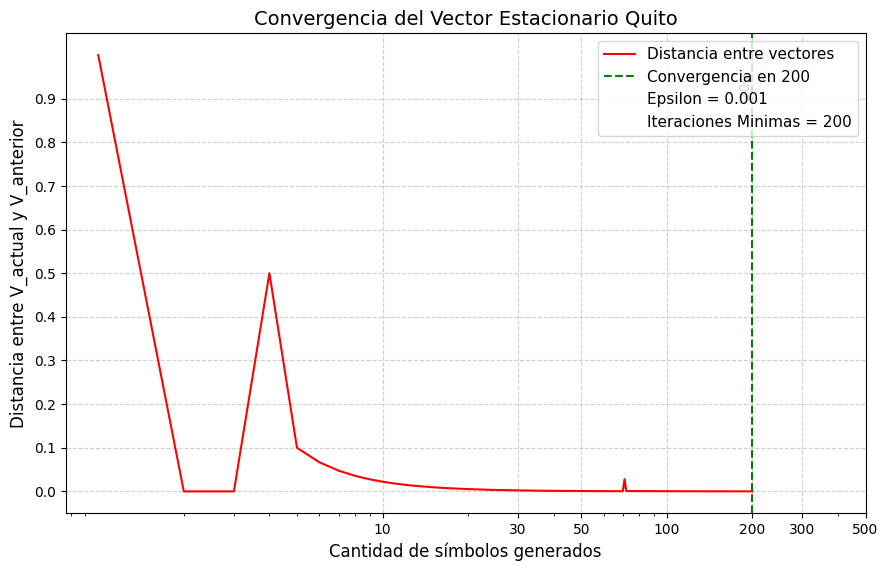

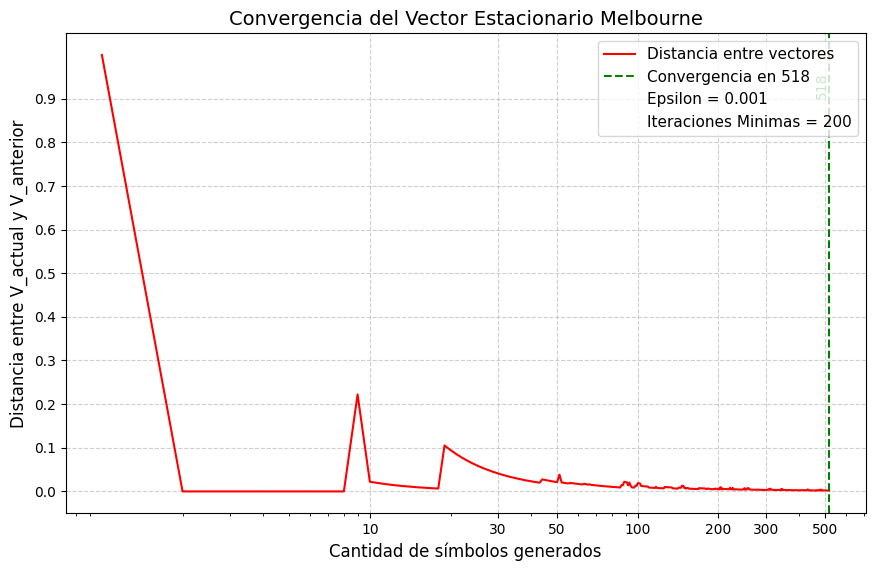

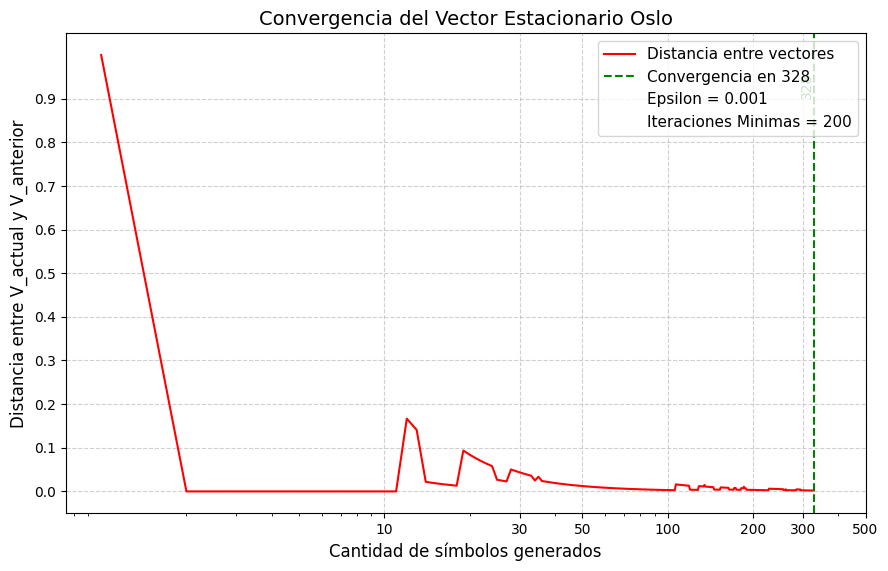

In [539]:
graficar_convergencia(iteraciones_quito, diferencia_quito, "Quito", convergencia_quito)
graficar_convergencia(iteraciones_melbourne, diferencia_melbourne, "Melbourne", convergencia_melbourne)
graficar_convergencia(iteraciones_oslo, diferencia_oslo, "Oslo", convergencia_oslo)

### Tiempo medio de primera recurrencia

In [540]:
S_MIN = 1000

def converge(A, B):
    epsilon = 0.05
    if abs(A - B) > epsilon:
        return False
    return True

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i


def Media_recurrencia(simbolo,m_acumulada):
    retornos=0
    media=0
    media_ant=-1
    t_actual=0
    s=simbolo
    while (not converge(media,media_ant)or (t_actual<S_MIN)):
        s=sig_dado_ant(s,m_acumulada)
        t_actual+=1
        if(s==simbolo):
            retornos+=1
            media_ant=media
            media=t_actual/retornos

    return media

### Media de recurrencia para simbolos F,T,C Quito

In [541]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_quito)))

Media de primera recurrencia para simbolo F 159.42045454545453
Media de primera recurrencia para simbolo T 1.0070493454179255
Media de primera recurrencia para simbolo C 1394.6204081632652


### Media de recurrencia para simbolos F,T,C Melborne

In [542]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_melbourne)))

Media de primera recurrencia para simbolo F 27.556962025316455
Media de primera recurrencia para simbolo T 2.2675736961451247
Media de primera recurrencia para simbolo C 2.074688796680498


### Media de recurrencia para simbolos F,T,C Oslo

In [543]:
print("Media de primera recurrencia para simbolo F: "+str(Media_recurrencia(0,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo T: "+str(Media_recurrencia(1,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo C: "+str(Media_recurrencia(2,m_acumulada_oslo)))

Media de primera recurrencia para simbolo F: 1.3966480446927374
Media de primera recurrencia para simbolo T: 2.8984615384615386
Media de primera recurrencia para simbolo C: 19.03846153846154


# Parte 3: Entropía, Huffman y la batalla por los bits

## 1. Calcular la entropía

### Entropía sin memoria

In [544]:
import math

def entropia_sin_mem(prob):
    entropia = 0
    for i in range(len(prob)):
        if prob[i] > 0:
            entropia += - prob[i] * math.log2(prob[i])
    return entropia

In [545]:
entropia_quito = entropia_sin_mem(v_estacionario_quito)
entropia_melbourne = entropia_sin_mem(v_estacionario_melbourne)
entropia_oslo = entropia_sin_mem(v_estacionario_oslo)

print(f"Entropía sin memoria quito: {entropia_quito}")
print(f"Entropia sin memoria melbourne: {entropia_melbourne}")
print(f"Entropia sin memoria oslo: {entropia_oslo}")

Entropía sin memoria quito: 0.09079313589591118
Entropia sin memoria melbourne: 1.2985265921515707
Entropia sin memoria oslo: 0.954740282116714


### Entropía con memoria

In [546]:
def calcular_hi(matriz_transicion):
    h = [0, 0, 0]
    for j in range(3):
        for i in range(3):
            p = matriz_transicion[i][j]
            if p > 0:
                h[j] += float(- p * math.log2(p))
    return h

In [547]:
def calcular_entropia_memoria(probabilidades, matriz_transicion):
    hcond = 0
    for j in range(len(probabilidades)):
        hi = 0
        for i in range(len(probabilidades)):
            p = matriz_transicion[i][j]
            if p > 0:
                hi += p * math.log2(p)
        hcond += probabilidades[j] * (-hi)
    return hcond

In [548]:
entropia_cond_quito = calcular_entropia_memoria(v_estacionario_quito, m_transicion_quito)
entropia_cond_melbourne = calcular_entropia_memoria(v_estacionario_melbourne, m_transicion_melbourne)
entropia_cond_oslo = calcular_entropia_memoria(v_estacionario_oslo, m_transicion_oslo)

print(f"Entropia quito con memoria 1: {entropia_cond_quito}")
print(f"Entropía melbourne con memoria 1: {entropia_cond_melbourne}")
print(f"Entropía oslo con memoria 1: {entropia_cond_oslo}")

Entropia quito con memoria 1: 0.06228562725004577
Entropía melbourne con memoria 1: 0.724576280519418
Entropía oslo con memoria 1: 0.3890865578603785


## 2. Implementar el Algoritmo de Huffman. Aplicar Teorema de Shannon

### Huffman

In [549]:


import heapq

#Aclaraciones: Utilizamos como estructura principal un min heap, que vimos en ayda 2. Para delegar la responsabilidad de obtener los nodos menores al heap.


#Nodo intermedio, solo tiene la probabilidad asociada
class Nodo:
    def __init__(self, probabilidad, izq=None, der=None):
        self.probabilidad = probabilidad
        self.nodo_izq = izq
        self.nodo_der = der
#Este metodo es para que el heap lo pueda utilizar internamente para comparar nodos
    def __lt__(self, other):
        return self.probabilidad < other.probabilidad
#Nodo hoja, probabilidad + simbolo
class Nodo_hoja(Nodo):
    def __init__(self, simbolo, probabilidad):
        super().__init__(probabilidad)
        self.simbolo = simbolo
#Inicializacion del heap, con los nodos hoja
def insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos):
    for i in range(len(lista_prob)):
        n = Nodo_hoja(lista_simbolos[i], lista_prob[i])
        heapq.heappush(min_heap_nodos, n)

#Algoritmo de huffman
#Mientras no nos quedemos con un solo nodo en el heap hacemos:
# 1. Agarramos los dos nodos con menores probabilidades
# 2. Sumamos las dos probabilidad y creamos un nuevo nodo que tenga como hijos los dos nodos obtenidos y asignandole la suma de las probabilidades
# 3. Metemos el nodo nuevo al heap
def encontrar_arbol_huffman(min_heap_nodos, lista_prob, lista_simbolos):
    insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos)
    while len(min_heap_nodos) > 1:
        min1 = heapq.heappop(min_heap_nodos)
        min2 = heapq.heappop(min_heap_nodos)
        suma_minimos = min1.probabilidad + min2.probabilidad
        nodo_suma = Nodo(suma_minimos, min1, min2)
        heapq.heappush(min_heap_nodos, nodo_suma)
    return heapq.heappop(min_heap_nodos)  


#Para obtener la codificacion hacemos un recorrido preorder, como los que vimos en prog 2:
#Si no estamos en un nodo hoja(no llegamos al final)
#Nos metemos por la izquierda concatenando 0 y a la derecha concatenando 1.
def generar_codigos(nodo, codigo_actual="", diccionario=None):
    if diccionario is None:
        diccionario = {}

    if isinstance(nodo, Nodo_hoja):  
        diccionario[nodo.simbolo] = [codigo_actual, nodo.probabilidad]
    else:
        
        if nodo.nodo_izq:
            generar_codigos(nodo.nodo_izq, codigo_actual + "0", diccionario)
        
        if nodo.nodo_der:
            generar_codigos(nodo.nodo_der, codigo_actual + "1", diccionario)

    return diccionario

In [550]:
heap =[]

codigos_quito = generar_codigos(encontrar_arbol_huffman(heap, v_estacionario_quito, ["F","T","C"]))
codigos_melbourne = generar_codigos(encontrar_arbol_huffman(heap, v_estacionario_melbourne, ["F","T","C"]))
codigos_oslo = generar_codigos(encontrar_arbol_huffman(heap, v_estacionario_oslo, ["F","T","C"]))

print("Codificación Huffman símbolos Quito:", codigos_quito)
print("Codificación Huffman símbolos Melbourne:", codigos_melbourne)
print("Codificación Huffman símbolos Oslo:", codigos_oslo)

Codificación Huffman símbolos Quito: {'F': ['00', 0.005], 'C': ['01', 0.005], 'T': ['1', 0.99]}
Codificación Huffman símbolos Melbourne: {'C': ['0', 0.48455598455598453], 'F': ['10', 0.07142857142857142], 'T': ['11', 0.444015444015444]}
Codificación Huffman símbolos Oslo: {'C': ['00', 0.006097560975609756], 'T': ['01', 0.3201219512195122], 'F': ['1', 0.6737804878048781]}


### Huffman para fuente extendida a 2 símbolos

In [551]:
def extender_fuente(fuente, probabilidades, matriz_transicion):
    # Mapear símbolos a índices
    fuente_extendida = []
    simbolo_a_indice = {simbolo: idx for idx, simbolo in enumerate(fuente)}
    
    probabilidades_extendidas = []
    for s1 in fuente:
        for s2 in fuente:
            idx_s1 = simbolo_a_indice[s1]
            idx_s2 = simbolo_a_indice[s2]
            probabilidad = float(probabilidades[idx_s1] * matriz_transicion[idx_s2][idx_s1])
            nuevo_simbolo = f"{s1}{s2}"
            if probabilidad != 0.0:
                fuente_extendida.append(nuevo_simbolo)
                probabilidades_extendidas.append((nuevo_simbolo, probabilidad))
    
    return probabilidades_extendidas, fuente_extendida

In [552]:
fuente = ["F", "T", "C"]

prob_extendida_quito, fuente_extendida_quito = extender_fuente(fuente, v_estacionario_quito, m_transicion_quito)
prob_extendida_melbourne, fuente_extendida_melbourne = extender_fuente(fuente, v_estacionario_melbourne, m_transicion_melbourne)
prob_extendida_oslo, fuente_extendida_oslo = extender_fuente(fuente, v_estacionario_oslo, m_transicion_oslo)
print(f"Probabilidad extendida Quito: {prob_extendida_quito}")
print(f"Probabilidad extendida Melbourne: {prob_extendida_melbourne}")
print(f"Probabilidad extendida Oslo: {prob_extendida_oslo}")

Probabilidad extendida Quito: [('FF', 0.0002702702702702703), ('FT', 0.00472972972972973), ('TF', 0.005972078593588418), ('TT', 0.9833453981385729), ('TC', 0.0006825232678386764), ('CT', 0.005)]
Probabilidad extendida Melbourne: [('FF', 0.033571428571428565), ('FT', 0.03535714285714286), ('FC', 0.0025), ('TF', 0.01486558300897158), ('TT', 0.37103894560776535), ('TC', 0.05811091539870707), ('CF', 0.0012628041295204362), ('CT', 0.06981502830348697), ('CC', 0.4134781521229771)]
Probabilidad extendida Oslo: [('FF', 0.6463718979590595), ('FT', 0.027408589845818596), ('TF', 0.031816998810232006), ('TT', 0.2769835663295657), ('TC', 0.011321386079714455), ('CT', 0.0018043802887008462), ('CC', 0.00429318068690891)]


In [553]:
heap =[]

only_prob_extendida_quito = [prob for _, prob in prob_extendida_quito]
only_prob_extendida_melbourne = [prob for _, prob in prob_extendida_melbourne]
only_prob_extendida_oslo = [prob for _, prob in prob_extendida_oslo]

codigos_ext2_quito = generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_quito, fuente_extendida_quito))
codigos_ext2_melbourne = generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_melbourne, fuente_extendida_melbourne))
codigos_ext2_oslo = generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_oslo, fuente_extendida_oslo))

print("Codificación Huffman símbolos Quito extendidos:", codigos_ext2_quito)
print("Codificación Huffman símbolos Melbourne extendidos:", codigos_ext2_melbourne)
print("Codificación Huffman símbolos Oslo extendidos:", codigos_ext2_oslo)

Codificación Huffman símbolos Quito extendidos: {'TF': ['00', 0.005972078593588418], 'CT': ['010', 0.005], 'FF': ['01100', 0.0002702702702702703], 'TC': ['01101', 0.0006825232678386764], 'FT': ['0111', 0.00472972972972973], 'TT': ['1', 0.9833453981385729]}
Codificación Huffman símbolos Melbourne extendidos: {'CC': ['0', 0.4134781521229771], 'FT': ['1000', 0.03535714285714286], 'CF': ['1001000', 0.0012628041295204362], 'FC': ['1001001', 0.0025], 'TF': ['100101', 0.01486558300897158], 'FF': ['10011', 0.033571428571428565], 'TC': ['1010', 0.05811091539870707], 'CT': ['1011', 0.06981502830348697], 'TT': ['11', 0.37103894560776535]}
Codificación Huffman símbolos Oslo extendidos: {'TF': ['000', 0.031816998810232006], 'CT': ['001000', 0.0018043802887008462], 'CC': ['001001', 0.00429318068690891], 'TC': ['00101', 0.011321386079714455], 'FT': ['0011', 0.027408589845818596], 'TT': ['01', 0.2769835663295657], 'FF': ['1', 0.6463718979590595]}


### Longitud Media

In [554]:
def longitud_media(codigos):
    long_media = 0

    for clave in codigos:
        long_media += codigos[clave][1] * len(codigos[clave][0]) # prob * l

    return long_media

In [555]:
long_media_quito = longitud_media(codigos_quito)
long_media_melbourne = longitud_media(codigos_melbourne)
long_media_oslo = longitud_media(codigos_oslo)

print("Longitud Media de Quito (sin extender): ", long_media_quito)
print("Longitud Media de Melbourne (sin extender): ", long_media_melbourne)
print("Longitud Media de Oslo (sin extender): ", long_media_oslo)

Longitud Media de Quito (sin extender):  1.01
Longitud Media de Melbourne (sin extender):  1.5154440154440154
Longitud Media de Oslo (sin extender):  1.326219512195122


In [556]:
long_media_ext2_quito = longitud_media(codigos_ext2_quito)
long_media_ext2_melbourne = longitud_media(codigos_ext2_melbourne)
long_media_ext2_oslo = longitud_media(codigos_ext2_oslo)

print("Longitud Media de Quito (extension a 2 simbolos): ", long_media_ext2_quito)
print("Longitud Media de Melbourne (extension a 2 simbolos): ", long_media_ext2_melbourne)
print("Longitud Media de Oslo (extension a 2 simbolos): ", long_media_ext2_oslo)

print(codigos_ext2_quito)

Longitud Media de Quito (extension a 2 simbolos):  1.0339724419352134
Longitud Media de Melbourne (extension a 2 simbolos):  2.092078659393471
Longitud Media de Oslo (extension a 2 simbolos):  1.4986166826843923
{'TF': ['00', 0.005972078593588418], 'CT': ['010', 0.005], 'FF': ['01100', 0.0002702702702702703], 'TC': ['01101', 0.0006825232678386764], 'FT': ['0111', 0.00472972972972973], 'TT': ['1', 0.9833453981385729]}


### Verificación del teorema de Shannon

In [557]:
# Verificación para la fuente sin extender
print(f"{entropia_quito} <= {long_media_quito} < {entropia_melbourne + 1}")
if entropia_quito <= long_media_quito < (entropia_quito + 1):
    print("La fuente de la temperatura en la ciudad de Quito cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")

print(f"{entropia_melbourne} <= {long_media_melbourne} < {entropia_melbourne + 1}")
if entropia_melbourne <= long_media_melbourne < (entropia_melbourne + 1):
    print("La fuente de la temperatura en la ciudad de Melbourne cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")


print(f"{entropia_oslo} <= {long_media_oslo} < {entropia_oslo + 1}")
if entropia_oslo <= long_media_oslo < (entropia_oslo + 1):
    print("La fuente de la temperatura de la ciudad de Oslo cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")

0.09079313589591118 <= 1.01 < 2.2985265921515707
La fuente de la temperatura en la ciudad de Quito cumple con el Teorema de Shannon
1.2985265921515707 <= 1.5154440154440154 < 2.2985265921515707
La fuente de la temperatura en la ciudad de Melbourne cumple con el Teorema de Shannon
0.954740282116714 <= 1.326219512195122 < 1.9547402821167141
La fuente de la temperatura de la ciudad de Oslo cumple con el Teorema de Shannon


In [558]:
# Verificación para la fuente extendida con memoria de orden 1

long_media_simbolo_quito = long_media_ext2_quito/2
long_media_simbolo_melbourne = long_media_ext2_melbourne/2
long_media_simbolo_oslo = long_media_ext2_oslo/2

lim_inferior_quito = entropia_quito/2 + 1/2 * entropia_cond_quito
lim_inferior_melbourne = entropia_melbourne/2 + 1/2 * entropia_cond_melbourne
lim_inferior_oslo = entropia_oslo/2 + 1/2 * entropia_cond_oslo

lim_superior_quito = lim_inferior_quito + 1/2
lim_superior_melbourne = lim_inferior_melbourne + 1/2
lim_superior_oslo = lim_inferior_oslo + 1/2

print(f"{lim_inferior_quito} <= {long_media_simbolo_quito} < {lim_superior_quito}")
if lim_inferior_quito <= long_media_simbolo_quito < lim_superior_quito:
    print("La fuente extendida de la temperatura en la ciudad de Quito cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")
    
print(f"{lim_inferior_melbourne} <= {long_media_simbolo_melbourne} < {lim_superior_melbourne}")
if lim_inferior_melbourne <= long_media_simbolo_melbourne < lim_superior_melbourne:
    print("La fuente extendida de la temperatura en la ciudad de Melbourne cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")
    
print(f"{lim_inferior_oslo} <= {long_media_simbolo_oslo} < {lim_superior_oslo}")
if lim_inferior_oslo <= long_media_simbolo_oslo < lim_superior_oslo:
    print("La fuente extendida de la temperatura en la ciudad de Oslo cumple con el Teorema de Shannon")
else:
    print("No cumple con el Teorema de Shannon")


0.07653938157297847 <= 0.5169862209676067 < 0.5765393815729785
La fuente extendida de la temperatura en la ciudad de Quito cumple con el Teorema de Shannon
1.0115514363354943 <= 1.0460393296967354 < 1.5115514363354943
La fuente extendida de la temperatura en la ciudad de Melbourne cumple con el Teorema de Shannon
0.6719134199885463 <= 0.7493083413421961 < 1.1719134199885461
La fuente extendida de la temperatura en la ciudad de Oslo cumple con el Teorema de Shannon


## 3. Obtener Tasa de Compresion

In [559]:
def hallar_codificacion_final(fuente_alfa, codigos):
    codificacion_final = ""
    for s in fuente_alfa:
        codificacion_final += codigos[s][0]

    return codificacion_final

In [560]:
tam_og_quito_bits = len(fuente_quito) * 8
tam_og_melbourne_bits = len(fuente_melbourne) * 8
tam_og_oslo_bits = len(fuente_oslo) * 8

print("Tamaño en bits de la fuente Quito original (sin compresión): ", tam_og_quito_bits)
print("Tamaño en bits de la fuente Melbourne original (sin compresión): ", tam_og_melbourne_bits)
print("Tamaño en bits de la fuente Oslo original (sin compresión): ", tam_og_oslo_bits)
print("")

tam_cod_final_quito_bits = len(hallar_codificacion_final(fuente_alfa_quito, codigos_quito)) 
tam_cod_final_melbourne_bits = len(hallar_codificacion_final(fuente_alfa_melbourne, codigos_melbourne))
tam_cod_final_oslo_bits = len(hallar_codificacion_final(fuente_alfa_oslo, codigos_oslo)) 

print("Tamaño en bits de la fuente Quito comprimida: ", tam_cod_final_quito_bits)
print("Tamaño en bits de la fuente Melbourne comprimida: ", tam_cod_final_melbourne_bits)
print("Tamaño en bits de la fuente Oslo comprimida: ", tam_cod_final_oslo_bits)
print("")

tasa_compresion_quito = tam_og_quito_bits / tam_cod_final_quito_bits
tasa_compresion_melbourne = tam_og_melbourne_bits / tam_cod_final_melbourne_bits
tasa_compresion_oslo = tam_og_oslo_bits / tam_cod_final_oslo_bits

print("Tasa de compresion Quito: ", int(tasa_compresion_quito),": 1")
print("Tasa de compresion Melbourne: ", int(tasa_compresion_melbourne),": 1")
print("Tasa de compresion Oslo: ", int(tasa_compresion_oslo),": 1")

Tamaño en bits de la fuente Quito original (sin compresión):  46752
Tamaño en bits de la fuente Melbourne original (sin compresión):  46752
Tamaño en bits de la fuente Oslo original (sin compresión):  46752

Tamaño en bits de la fuente Quito comprimida:  5885
Tamaño en bits de la fuente Melbourne comprimida:  9001
Tamaño en bits de la fuente Oslo comprimida:  7680

Tasa de compresion Quito:  7 : 1
Tasa de compresion Melbourne:  5 : 1
Tasa de compresion Oslo:  6 : 1


### Fuente extendida

In [561]:
def ext2_hallar_codificacion_final(fuente_alfa, codigos):
    codificacion_final = ""
    for i in range(0, len(fuente_alfa), 2):
        clave = fuente_alfa[i] + fuente_alfa[i+1]
        codificacion_final += codigos[clave][0]
    return codificacion_final

In [562]:
print(ext2_hallar_codificacion_final(fuente_alfa_quito, codigos_ext2_quito))

ext2_tam_cod_final_quito_bits = len(ext2_hallar_codificacion_final(fuente_alfa_quito, codigos_ext2_quito))
ext2_tam_cod_final_melbourne_bits = len(ext2_hallar_codificacion_final(fuente_alfa_melbourne, codigos_ext2_melbourne))
ext2_tam_cod_final_oslo_bits = len(ext2_hallar_codificacion_final(fuente_alfa_oslo, codigos_ext2_oslo))

print("Tamaño en bits de la fuente Quito comprimida extension 2: ", ext2_tam_cod_final_quito_bits)
print("Tamaño en bits de la fuente Melbourne comprimida extension 2: ", ext2_tam_cod_final_melbourne_bits)
print("Tamaño en bits de la fuente Oslo comprimida extension 2: ", ext2_tam_cod_final_oslo_bits)
print("")

ext2_tasa_compresion_quito = tam_og_quito_bits / ext2_tam_cod_final_quito_bits
ext2_tasa_compresion_melbourne = tam_og_melbourne_bits / ext2_tam_cod_final_melbourne_bits
ext2_tasa_compresion_oslo = tam_og_oslo_bits / ext2_tam_cod_final_oslo_bits

print("Tasa de compresion Quito: ", int(ext2_tasa_compresion_quito),": 1")
print("Tasa de compresion Melbourne: ", int(ext2_tasa_compresion_melbourne),": 1")
print("Tasa de compresion Oslo: ", int(ext2_tasa_compresion_oslo),": 1")

1111111111111111111111111111111110011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100001111111111111111111111111100111111111111011111111111111111111111111111111111111111111111111111111111111111110011111111111111111011111111111111111111111111111111111100111111111111111000111111111101111111111111111111111111111111111111111111111111111111011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110110111111111111111111111111111111111111111111111110011111111111111111100111001111111111111111111111111111111111111111111111111111111111111111111111111111111001111111111111111111111111111111111111111111111111111111111111111111110011111111111111111111111111111111111111111111111111111111111111111111101100111111111111111111111111111111111111111111101111111111111001111110111011111111110011111001111111111

In [563]:
print(len(fuente_alfa_quito))
print(fuente_alfa_quito)
print(fuente_extendida_quito)
print(codigos_ext2_quito)

5844
['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',

# Parte 4: El canal climático de Musk

## 1. Generar fuente y Matriz de Canal

In [564]:
archivo='temperature_Melbourne_celsius_ruidoso.csv'
valores_melbourne_ruidoso= []
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_melbourne_ruidoso = [float(fila[0]) for fila in reader]


fuente_melbourne_ruidoso, f_m_alfa = crear_fuente(valores_melbourne_ruidoso)
print(fuente_melbourne)
print(fuente_melbourne_ruidoso)



[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 

In [565]:
def matriz_transicion_dado_dos_canales(fuente_entrada,fuente_salida):
    m_transicion = np.zeros((3, 3), dtype=float)

    for i in range(0, len(fuente_entrada)):
        m_transicion[fuente_salida[i], fuente_entrada[i]] += 1

    # Sumar columnas
    suma_columnas = [0, 0, 0]
    for i in range(3):
        for j in range(3):
            suma_columnas[j] += m_transicion[i, j]

    # Normalizar columnas
    for i in range(3):
        for j in range(3):
            if suma_columnas[j] != 0:
                m_transicion[i, j] /= suma_columnas[j]

    return m_transicion

In [566]:
m_transicion_melbourne_ruidoso = matriz_transicion_dado_dos_canales(fuente_melbourne,fuente_melbourne_ruidoso)
print(m_transicion_melbourne_ruidoso)

[[0.61       0.13966858 0.        ]
 [0.39       0.67467027 0.24302196]
 [0.         0.18566114 0.75697804]]


## 2. Ruido e Información Mutua

In [567]:
def ruido(prob_x, vector_hi):
    ruido = 0
    for i in range(3):
        ruido += prob_x[i] * vector_hi[i]
    return ruido

In [568]:
vector_hi_melbourne_ruidoso = calcular_hi(m_transicion_melbourne_ruidoso)
ruido_melbourne_ruidoso = ruido(v_estacionario_melbourne, vector_hi_melbourne_ruidoso)

print("Ruido del canal: ", ruido_melbourne_ruidoso)

Ruido del canal:  1.0030264118859549


### Matriz conjunta

In [569]:
def matriz_conjunta(prob_x, m_transicion):
    m_conjunta = np.zeros((3, 3), dtype=float)

    for j in range(3):
        for i in range(3):
            m_conjunta[i][j] = prob_x[j] * m_transicion[i][j]
    
    return m_conjunta


# Verificación
def verificar_m_conjunta(m_conjunta):
    suma = 0
    for i in range(3):
        for j in range(3):
            suma += m_conjunta[i][j]

    print(suma)

In [570]:
m_conjunta_melbourne_ruidoso = matriz_conjunta(v_estacionario_melbourne, m_transicion_melbourne_ruidoso)

print("Matriz Conjunta de Melbourne Ruidoso: \n", m_conjunta_melbourne_ruidoso)
verificar_m_conjunta(m_conjunta_melbourne_ruidoso)

Matriz Conjunta de Melbourne Ruidoso: 
 [[0.04357143 0.06201501 0.        ]
 [0.02785714 0.29956402 0.11775774]
 [0.         0.08243641 0.36679824]]
1.0


### Hallar P(Y), y luego H(Y)

In [571]:
def calcular_py(m_conjunta):
    py = [0, 0, 0]
    for i in range(3):
        for j in range(3):
            py[i] += float(m_conjunta[i][j])
    return py

py_melbourne_ruidoso = calcular_py(m_conjunta_melbourne_ruidoso)
print(py_melbourne_ruidoso)

hy_melbourne_ruidoso = entropia_sin_mem(py_melbourne_ruidoso)
print(hy_melbourne_ruidoso)

[0.10558643647754232, 0.44517890801929083, 0.4492346555031668]
1.3808583688764067


### Información Mutua

In [572]:
# Informacion Mutua = H(y) - H(y/x)
info_mutua_melbourne_ruidoso = hy_melbourne_ruidoso - ruido_melbourne_ruidoso

print("Informacion Mutua del canal de Melbourne: ", info_mutua_melbourne_ruidoso)

Informacion Mutua del canal de Melbourne:  0.3778319569904518
